In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [3]:
df = pd.read_csv('exercisedataset.csv')
df

,ID,1,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,1 Intensity
0,1,1 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,1 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,1 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,1 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,1 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,3860,1 5,154.113144,98.147291,96.745133,20,Female,22,139,32.447764,Cloudy,7
3860,3861,1 4,486.392768,97.598957,92.700573,21,Female,49,160,26.602475,Rainy,5
3861,3862,1 4,264.307731,94.946612,96.778936,57,Male,56,167,31.435348,Rainy,9
3862,3863,1 9,185.951870,64.743906,68.662889,58,Female,60,128,19.774614,Rainy,1


In [4]:
df.head()

,ID,1,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,1 Intensity
0,1,1 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,1 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,1 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,1 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,1 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   1                   3864 non-null   object 
 1   Calories Burn       3864 non-null   float64
 2   Dream Weight        3864 non-null   float64
 3   Actual Weight       3864 non-null   float64
 4   Age                 3864 non-null   int64  
 5   Gender              3864 non-null   object 
 6   Duration            3864 non-null   int64  
 7   Heart Rate          3864 non-null   int64  
 8   BMI                 3864 non-null   float64
 9   Weather Conditions  3864 non-null   object 
 10  1 Intensity         3864 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 332.2+ KB


In [7]:
df.describe()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,1 Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [9]:
df['1'].unique()

array(['1 2', '1 7', '1 4', '1 5', '1 10', '1 1', '1 9', '1 8', '1 6',
       '1 3'], dtype=object)

In [10]:
df.rename(columns={'Weather Conditions':'Weather'},inplace=True)

In [11]:
df.head()

,1,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather,1 Intensity
0,1 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,1 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,1 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,1 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,1 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [12]:
df.groupby(by='Gender').mean() #we have grouped by using 'Gender' columns values and calculated mean values by it

C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\167876959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Gender').mean() #we have grouped by using 'Gender' columns values and calculated mean values by it


,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,1 Intensity
Gender,,,,,,,,
Female,305.079815,75.388762,75.428577,39.929226,40.216904,139.099796,26.776949,5.471996
Male,298.535402,74.881360,74.940214,39.302632,40.164211,140.478947,26.827848,5.442105


In [14]:
df['1'].value_counts()

1 5     404
1 1     403
1 10    398
1 8     397
1 9     394
1 7     386
1 3     385
1 6     381
1 4     371
1 2     345
Name: 1, dtype: int64

C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\1131278770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='magma',annot=True,fmt='.3f') #we calculated correlation about df's informations and colorizied it with seaborn.


<Axes: >

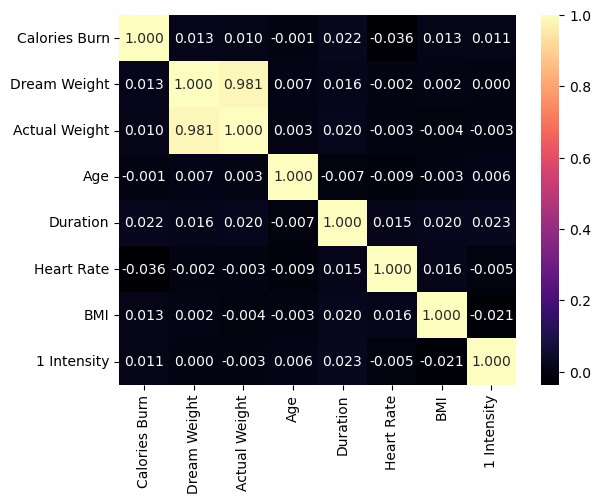

In [15]:
sns.heatmap(df.corr(),cmap='magma',annot=True,fmt='.3f') #we calculated correlation about df's informations and colorizied it with seaborn.

In [16]:
np.where(df['Age']==20) # we checked the 'Age' column's values where it is 20.


(array([   2,   35,   65,  178,  233,  321,  347,  415,  427,  429,  484,
         494,  501,  532,  593,  663,  673,  677,  742,  760,  787,  812,
         843,  853,  883,  934,  953,  965,  987, 1018, 1021, 1048, 1081,
        1082, 1109, 1114, 1270, 1493, 1533, 1557, 1592, 1604, 1608, 1616,
        1626, 1737, 1786, 1799, 1951, 2018, 2041, 2119, 2140, 2154, 2160,
        2188, 2217, 2227, 2291, 2319, 2321, 2324, 2353, 2368, 2371, 2412,
        2425, 2439, 2500, 2698, 2708, 2776, 2834, 2836, 2850, 2860, 2907,
        2910, 3170, 3411, 3444, 3469, 3502, 3647, 3670, 3719, 3749, 3801,
        3853, 3859], dtype=int64),)

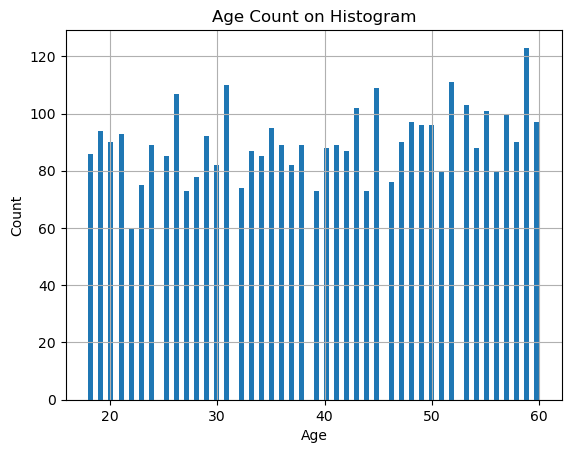

In [17]:
df['Age'].hist(bins=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count on Histogram')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\4052891312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby(by='Gender').mean().index,df.groupby(by='Gender').mean().iloc[:,0],width=0.2)
C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\4052891312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby(by='Gender').mean().index,df.groupby(by='Gender').mean().iloc[:,0],width=0.2)


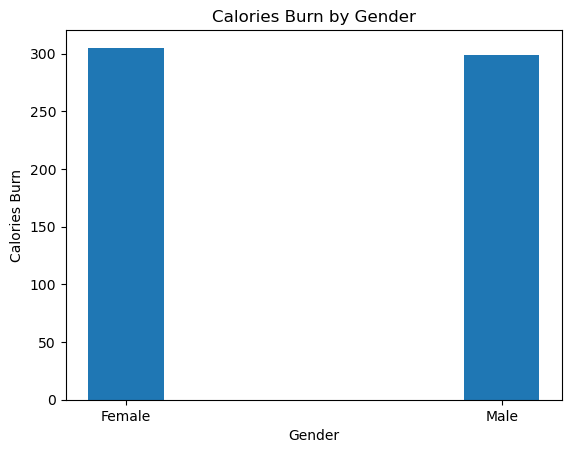

In [18]:
plt.bar(df.groupby(by='Gender').mean().index,df.groupby(by='Gender').mean().iloc[:,0],width=0.2)
plt.xlabel('Gender')
plt.ylabel('Calories Burn')
plt.title('Calories Burn by Gender')
plt.show()

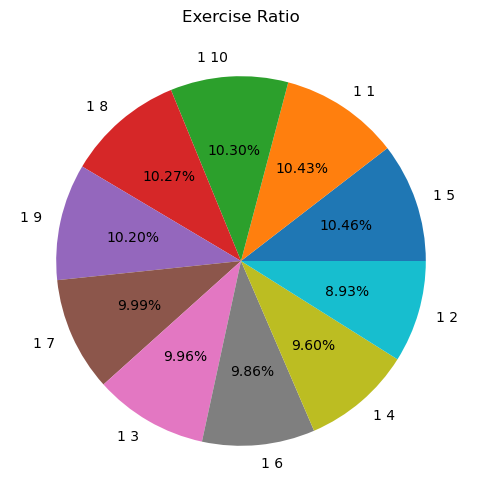

In [20]:
plt.figure(figsize=(12,6))
plt.pie(df["1"].value_counts().values,labels=df["1"].value_counts().index,autopct="%.02f%%")
plt.title("Exercise Ratio")
plt.show()

In [21]:
df.groupby(by='Age').mean().head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\2382623975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Age').mean().head()


,Calories Burn,Dream Weight,Actual Weight,Duration,Heart Rate,BMI,1 Intensity
Age,,,,,,,
18,295.008797,74.278790,74.638901,38.069767,135.988372,27.757458,5.186047
19,313.298650,73.198034,72.847620,42.478723,143.223404,27.020834,4.670213
20,304.050345,77.553701,77.470319,38.355556,140.333333,26.684299,5.888889
21,306.575217,75.702047,75.840851,40.784946,139.860215,26.825321,5.419355
22,314.764680,74.555833,74.470249,43.333333,142.233333,26.397697,5.966667


C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\3341589914.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='1').mean().iloc[:,0], df.groupby(by='1').mean().iloc[:,2],  color='red',marker='s')
C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\3341589914.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='1').mean().iloc[:,0], df.groupby(by='1').mean().iloc[:,2],  color='red',marker='s')


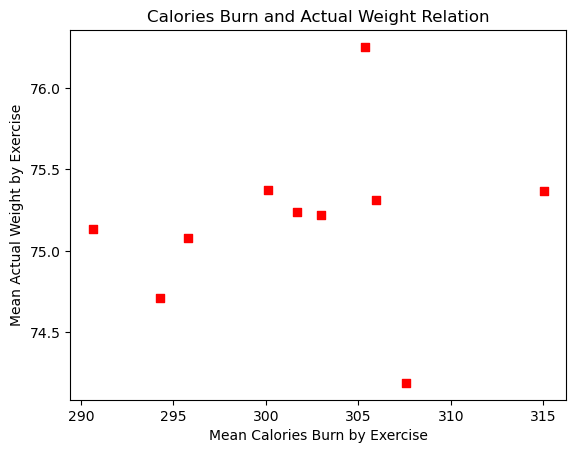

In [23]:
plt.scatter(df.groupby(by='1').mean().iloc[:,0], df.groupby(by='1').mean().iloc[:,2],  color='red',marker='s')
plt.xlabel("Mean Calories Burn by Exercise")
plt.ylabel("Mean Actual Weight by Exercise")
plt.title('Calories Burn and Actual Weight Relation')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\505473970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='1').mean().iloc[:,0], df.groupby(by='1').mean().iloc[:,6],color='blue',marker='x')
C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\505473970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(df.groupby(by='1').mean().iloc[:,0], df.groupby(by='1').mean().iloc[:,6],color='blue',marker='x')


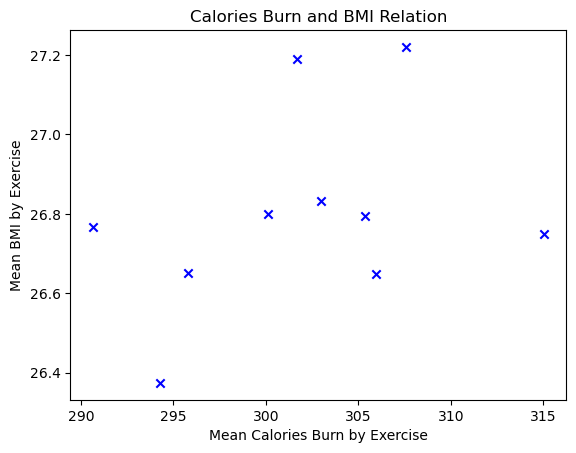

In [24]:
plt.scatter(df.groupby(by='1').mean().iloc[:,0], df.groupby(by='1').mean().iloc[:,6],color='blue',marker='x')
plt.xlabel("Mean Calories Burn by Exercise")
plt.ylabel("Mean BMI by Exercise")
plt.title('Calories Burn and BMI Relation')
plt.show()

In [28]:
df1 = pd.get_dummies(df,columns={'Gender','Weather','1'},drop_first=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_21196\2700996738.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1 = pd.get_dummies(df,columns={'Gender','Weather','1'},drop_first=True)


In [29]:
df1.head()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,1 Intensity,Gender_Male,1_1 10,1_1 2,1_1 3,1_1 4,1_1 5,1_1 6,1_1 7,1_1 8,1_1 9,Weather_Rainy,Weather_Sunny
0,286.959851,91.892531,96.301115,45,37,170,29.426275,5,1,0,1,0,0,0,0,0,0,0,1,0
1,343.453036,64.165097,61.104668,25,43,142,21.286346,5,1,0,0,0,0,0,0,1,0,0,1,0
2,261.223465,70.846224,71.766724,20,20,148,27.899592,4,1,0,0,0,1,0,0,0,0,0,0,0
3,127.183858,79.477008,82.984456,33,39,170,33.729552,10,1,0,0,0,0,1,0,0,0,0,0,1
4,416.318374,89.960226,85.643174,29,34,118,23.286113,3,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Calories Burn  3864 non-null   float64
 1   Dream Weight   3864 non-null   float64
 2   Actual Weight  3864 non-null   float64
 3   Age            3864 non-null   int64  
 4   Duration       3864 non-null   int64  
 5   Heart Rate     3864 non-null   int64  
 6   BMI            3864 non-null   float64
 7   1 Intensity    3864 non-null   int64  
 8   Gender_Male    3864 non-null   uint8  
 9   1_1 10         3864 non-null   uint8  
 10  1_1 2          3864 non-null   uint8  
 11  1_1 3          3864 non-null   uint8  
 12  1_1 4          3864 non-null   uint8  
 13  1_1 5          3864 non-null   uint8  
 14  1_1 6          3864 non-null   uint8  
 15  1_1 7          3864 non-null   uint8  
 16  1_1 8          3864 non-null   uint8  
 17  1_1 9          3864 non-null   uint8  
 18  Weather_

In [31]:
x1 = df1.drop('Actual Weight',axis=1)
y1 = df1['Actual Weight']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=11)

In [34]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_score = model.score(x_test,y_test)
y_score

0.9639775760708389

In [35]:
model.intercept_ # we call the constant term

0.8891934610070393

In [36]:
model.coef_ #we call independent variables's coefficents.

array([-7.81233275e-05,  1.00114960e+00, -5.07836710e-03,  2.85523613e-03,
        4.58226529e-04, -2.23414292e-02, -1.22891489e-02, -2.18750448e-02,
       -4.06524234e-01, -1.91365411e-01, -2.98692608e-01, -2.90810409e-01,
       -2.14804067e-01,  2.62429914e-02, -4.97826631e-02, -3.22675978e-01,
       -5.02029196e-01, -5.46882094e-02,  5.27212953e-02])

In [37]:
y_pred = model.predict(x_test)

In [38]:
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

2.85505257756364

In [39]:
np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

2.8071574889849606

In [40]:
cross_val_score(model, x1, y1, cv=10, scoring='r2').mean()


0.9628182532145317

In [41]:
cross_val_score(model, x_train, y_train, cv=10, scoring='r2').mean()


0.9624233697104912

In [42]:
np.sqrt(-cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

2.873902601528872

In [43]:
np.sqrt(-cross_val_score(model, x_test, y_test, cv=10, scoring='neg_mean_squared_error')).mean()

2.836630806241

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [57]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)

SyntaxError: invalid non-printable character U+00A0 (101715032.py, line 7)